# Bayesian Bootstrap

## 1. Description

If a standard bootstrap can be considered as obtaining a weighted estimate of samples from a discrete multinomial distribution, then the Bayesian bootstrap is a weighted estimate of samples from a continuous dirichelet distribution.

Using a continuous distribution allows for smoother estimates, particularly for small datasets and eliminates corner cases in which an estimate cannot be made from the standard bootstrap procedure. An example of this might be performing a regression on a binary predictor for which one of two classes is under-represented. In this case samples from the standard bootstrap may be drawn with only class, producing an invalid or misleading estimate. However in a bootstrap all values receive some positive weight and thus if both classes are present in the input data, both classes will be included in the sample.

Some references for further reading:
* https://matteocourthoud.github.io/post/bayes_boot/
* https://towardsdatascience.com/the-bayesian-bootstrap-6ca4a1d45148

## 2. Illustrate using sample data

Load the diabetes dataset, which contains:

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline." (sklearn docs)

In [7]:
import numpy as np
from sklearn.datasets import load_diabetes

features, target = load_diabetes(return_X_y=True)
N = len(target)
print(N)

442


Compare the bayesian and standard estimates.

Note that several authors suggest scaling the alpha parameter for the Dirichlet distribution by 4 to get better results, though I don't understand why this works.

In [27]:
n_iterations = 2000
estimator = np.average

alpha = np.ones(N) * 4
bayes_result = np.zeros(n_iterations)
standard_result = np.zeros(n_iterations)

for i in range(n_iterations):

    np.random.seed(i)
    
    w = np.random.dirichlet(alpha, 1)[0]
    bayes_result[i] = estimator(target, weights=w)

    standard_result[i] = estimator(np.random.choice(target, N))

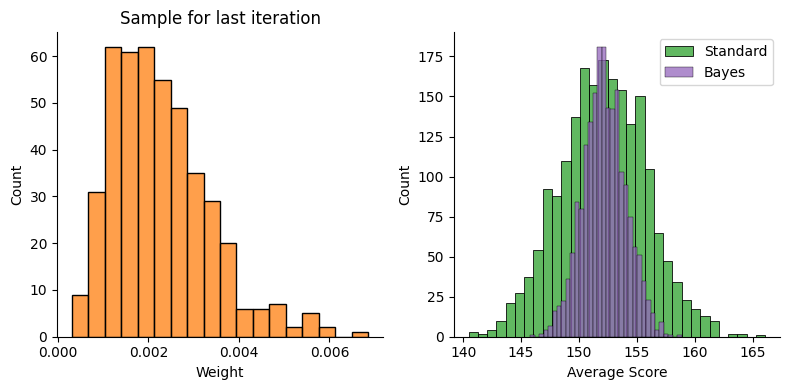

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2, figsize=(8,4))

sns.histplot(w, color='C1', ax=axs[0])

sns.histplot(standard_result, color='C2', ax=axs[1])
sns.histplot(bayes_result, color='C4', ax=axs[1])

axs[0].set_xlabel('Weight')
axs[0].set_title('Sample for last iteration')

axs[1].set_xlabel('Average Score')
axs[1].legend(['Standard','Bayes'])

sns.despine(ax=axs[0]) 
sns.despine(ax=axs[1]) 

plt.tight_layout()
plt.show()